In [1]:
# prompt: code to upload file
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('loan_dataset.csv')
df.head()

Saving loan_dataset.csv to loan_dataset.csv


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [2]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 45000 rows and 14 columns.


In [3]:
df.dtypes

,0
person_age,float64
person_gender,object
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64


In [4]:
#check null value
print(f'The dataset has {df.isna().sum().sum()} null values.')

The dataset has 0 null values.


In [5]:
#check duplicate value
print(f'The dataset has {df.duplicated().sum()} duplicate values.')

The dataset has 0 duplicate values.


In [6]:
# Descriptive statistics for numerical columns
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


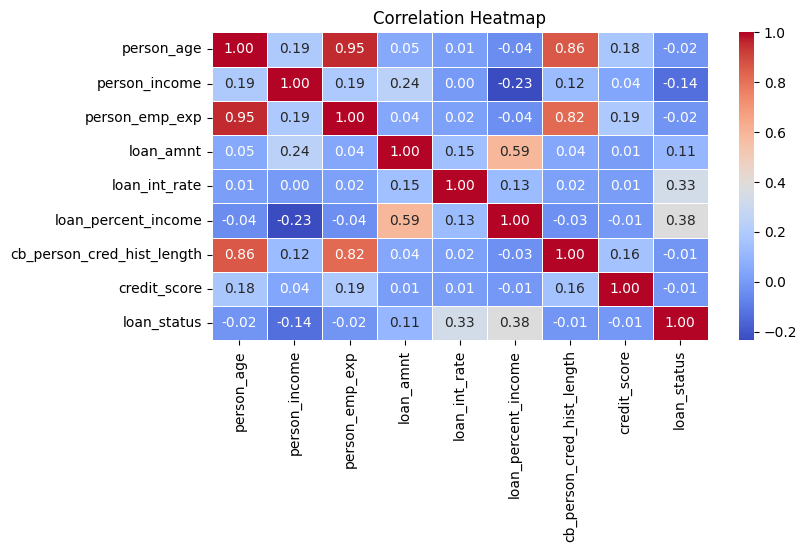

In [7]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Step 6: Check correlations
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Highly Correlated Feature Pairs (Threshold > 0.8):
                    Feature 1                   Feature 2  Correlation
0                  person_age              person_emp_exp     0.954412
2              person_emp_exp                  person_age     0.954412
1                  person_age  cb_person_cred_hist_length     0.861985
4  cb_person_cred_hist_length                  person_age     0.861985
3              person_emp_exp  cb_person_cred_hist_length     0.824272
5  cb_person_cred_hist_length              person_emp_exp     0.824272


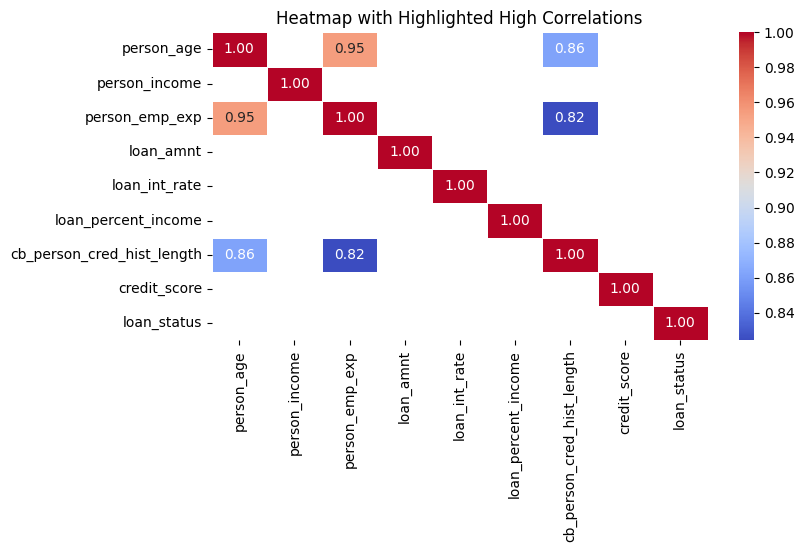

In [8]:
# Step: Check for Multicollinearity
# Set a threshold for high correlation (e.g., 0.8)
threshold = 0.8

# Find pairs of highly correlated features
high_corr = correlation_matrix[(correlation_matrix >= threshold) & (correlation_matrix < 1.0)]

# Display the features with high correlation
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)

print("Highly Correlated Feature Pairs (Threshold > 0.8):")
print(high_corr_pairs)

# Highlight high correlations on the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
            mask=~(correlation_matrix.abs() >= threshold))
plt.title("Heatmap with Highlighted High Correlations")
plt.show()

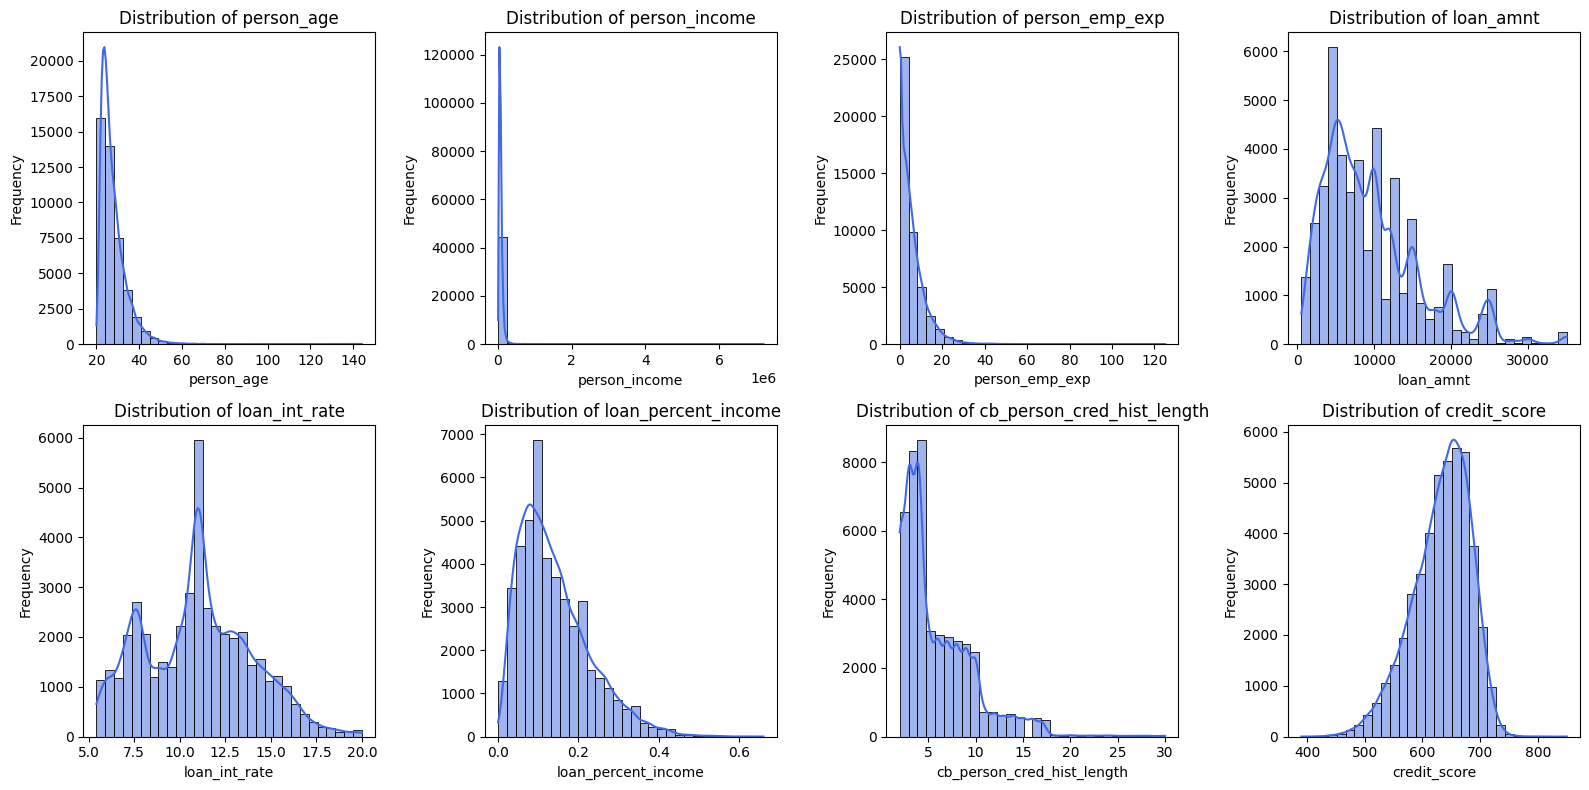

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numeric_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
                   'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

# Define layout
num_cols = 4  # 4 histograms per row
num_rows = -(-len(numeric_columns) // num_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
axes = axes.flatten()  # Flatten to iterate easily

# Plot histograms
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color='royalblue')
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=10)

# Hide unused subplots (if any)
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


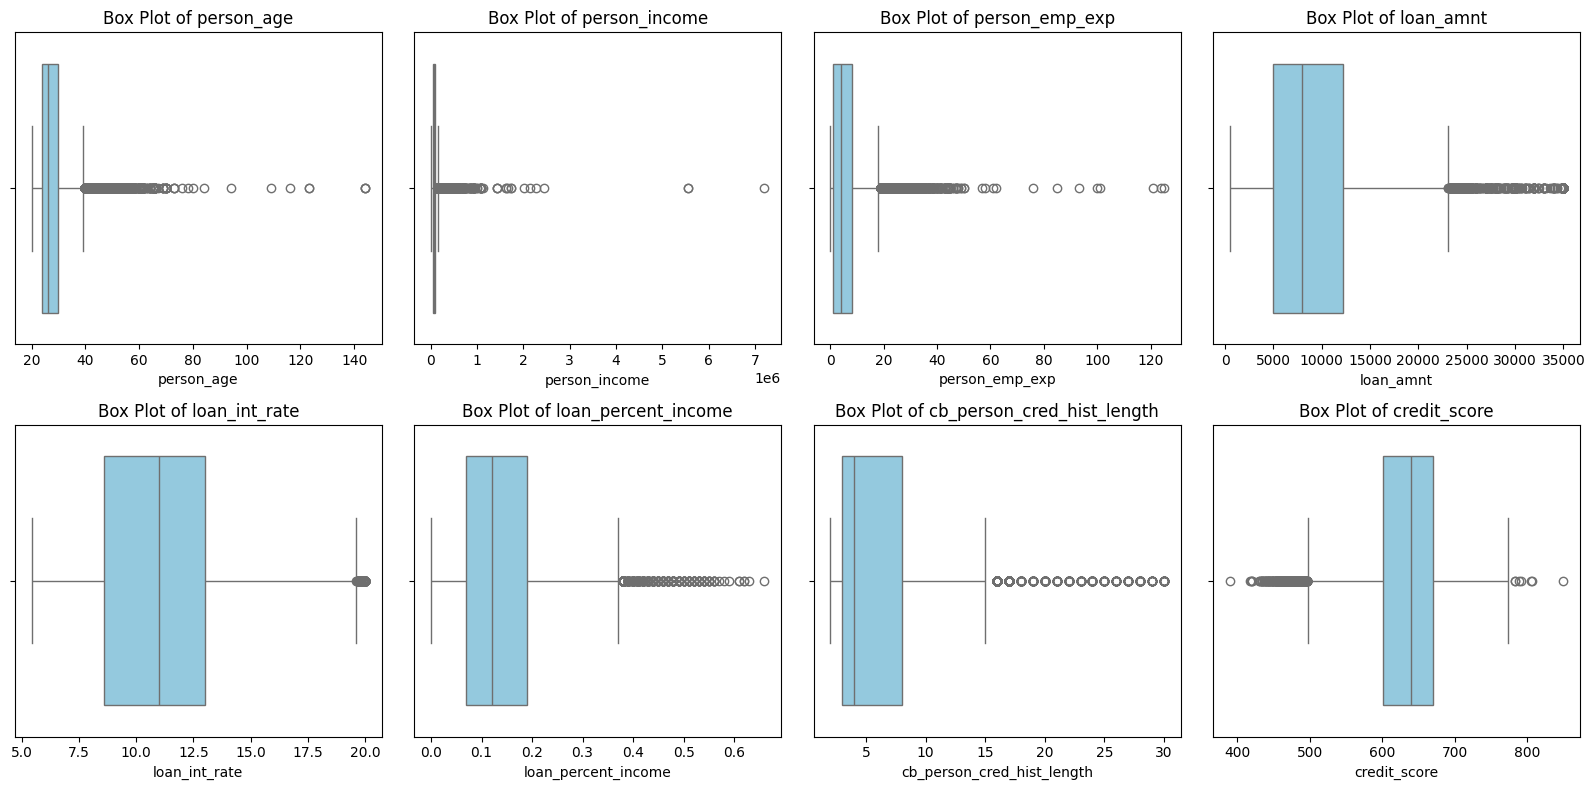

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns for box plots
numeric_columns_box = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
                       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

# Define layout
num_cols = 4  # 4 box plots per row
num_rows = -(-len(numeric_columns_box) // num_cols)  # Ceiling division for rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot box plots
for i, col in enumerate(numeric_columns_box):
    sns.boxplot(x=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Box Plot of {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)

# Hide unused subplots (if any)
for i in range(len(numeric_columns_box), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


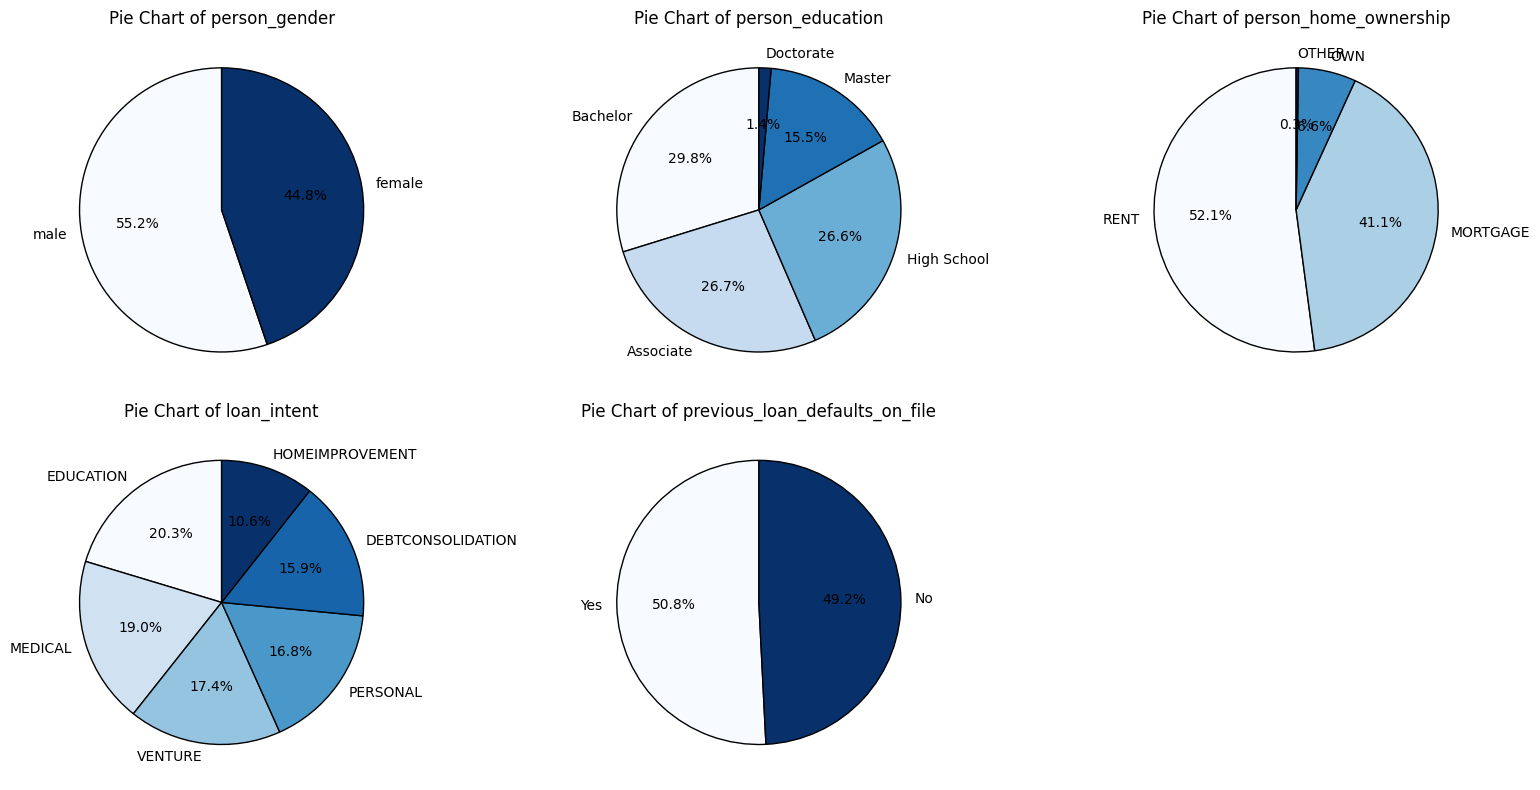

In [11]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Define layout
num_cols = 3  # 4 pie charts per row
num_rows = -(-len(categorical_columns) // num_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
axes = axes.flatten()  # Flatten to iterate easily

# Plot pie charts
for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%', startangle=90, cmap='Blues', ax=axes[i],
        wedgeprops={'edgecolor': 'black'},  # Add black edge for better separation
    )
    axes[i].set_title(f"Pie Chart of {col}", fontsize=12)
    axes[i].set_ylabel("")  # Remove default y-label

# Hide unused subplots (if any)
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Number of outliers removed: 7451
Data shape after removing outliers: (37549, 14)


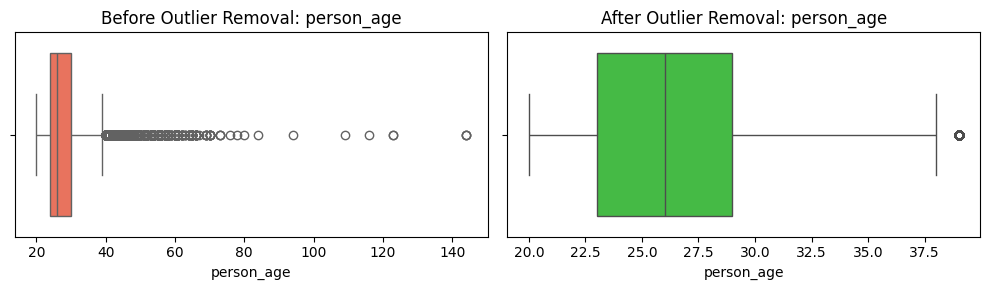

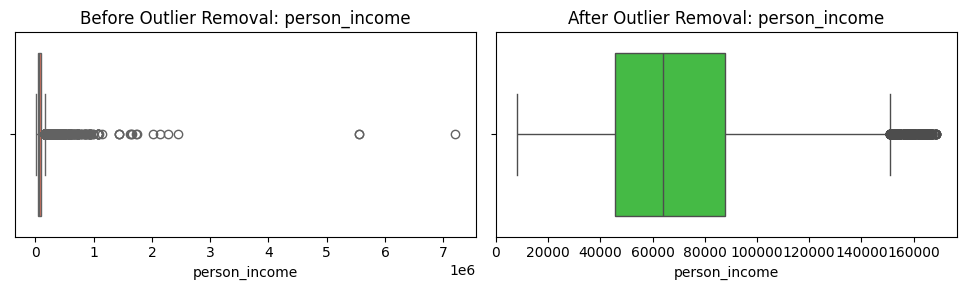

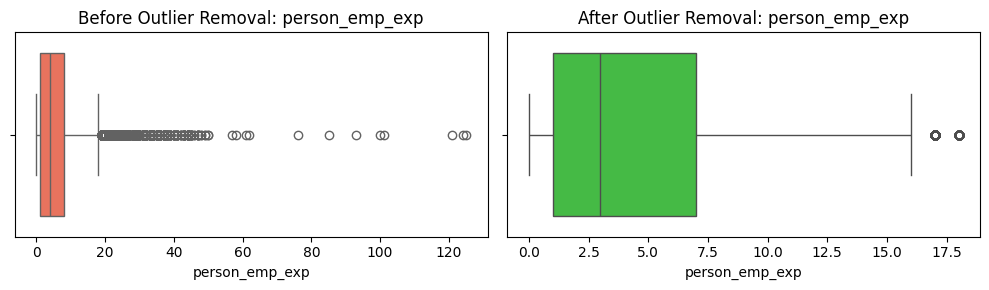

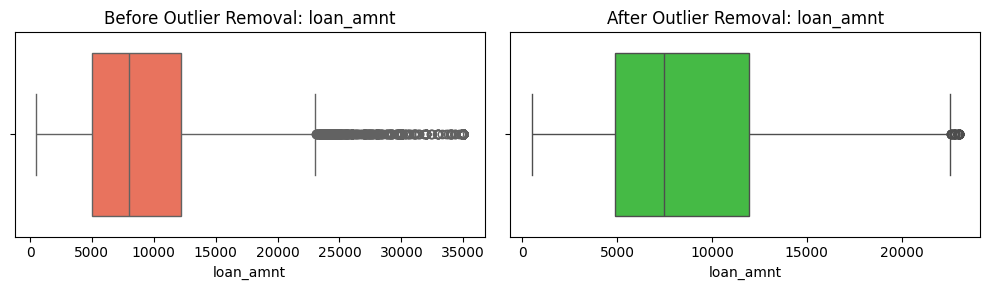

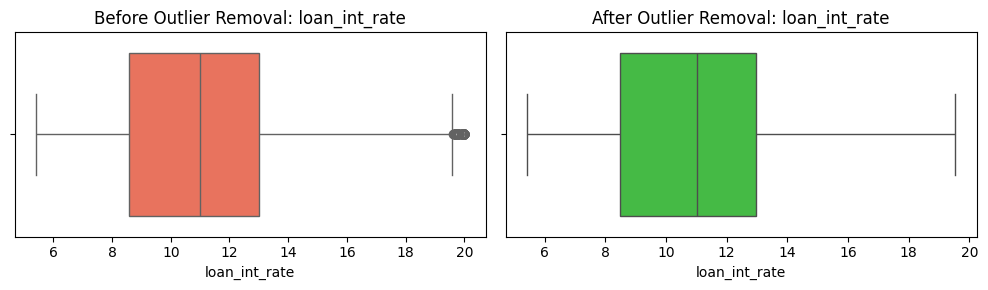

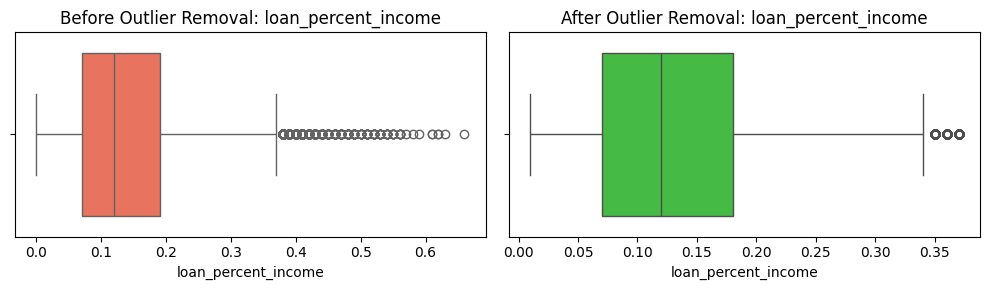

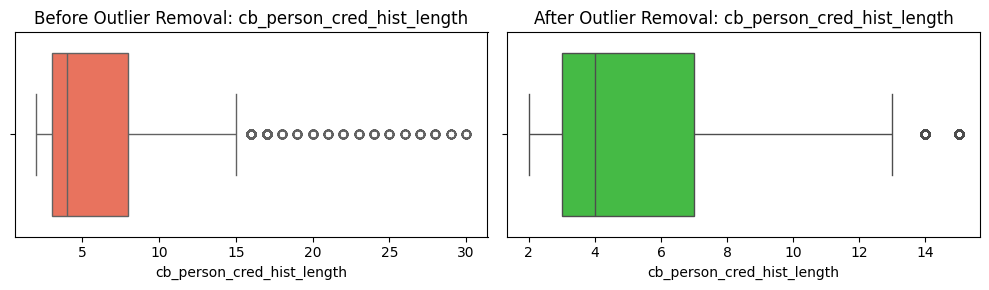

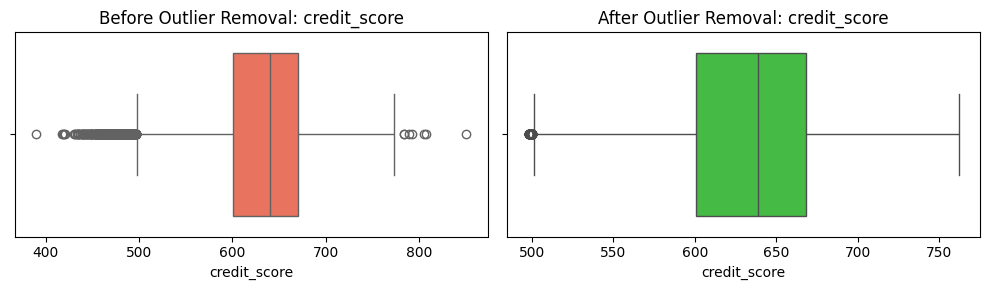

In [12]:
# Define numeric features
numeric_features = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
                    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

# Outlier detection using IQR
Q1 = df[numeric_features].quantile(0.25)  # First quartile
Q3 = df[numeric_features].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag rows with outliers
outliers = ((df[numeric_features] < lower_bound) | (df[numeric_features] > upper_bound)).any(axis=1)

# Store original data before outlier removal for plotting
df_original = df.copy()

# Remove outliers and update the main DataFrame
df = df[~outliers].reset_index(drop=True)

print(f"Number of outliers removed: {outliers.sum()}")
print(f"Data shape after removing outliers: {df.shape}")

# Loop through each numeric feature and plot before/after boxplots
for column in numeric_features:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))  # Two subplots (Before & After)

    # Boxplot before outlier removal
    sns.boxplot(x=df_original[column], ax=axes[0], color='#FF6347')  # Tomato Red
    axes[0].set_title(f"Before Outlier Removal: {column}")
    axes[0].set_xlabel(column)

    # Boxplot after outlier removal
    sns.boxplot(x=df[column], ax=axes[1], color='#32CD32')  # Lime Green
    axes[1].set_title(f"After Outlier Removal: {column}")
    axes[1].set_xlabel(column)

    # Improve layout
    plt.tight_layout()

    # Show the plots
    plt.show()


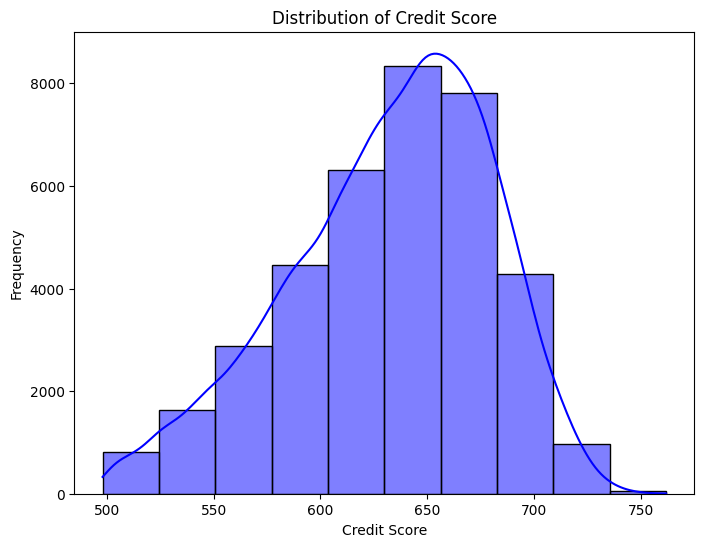

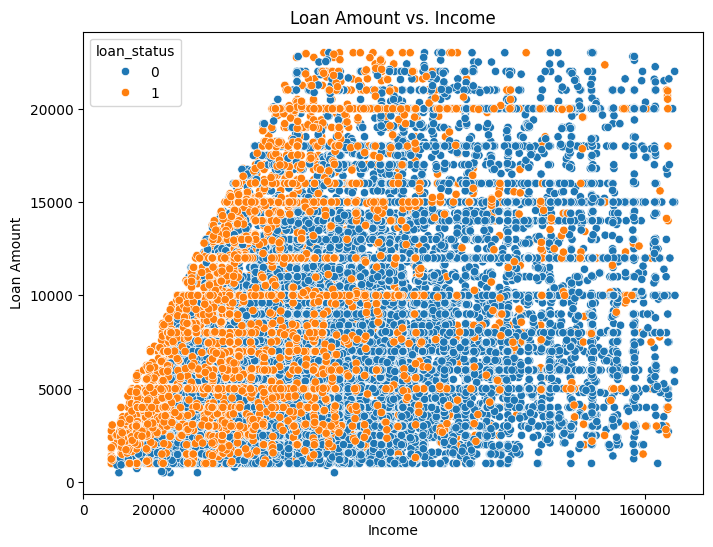

<ipython-input-13-062837a8cba4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan_intent", data=df, palette="coolwarm")


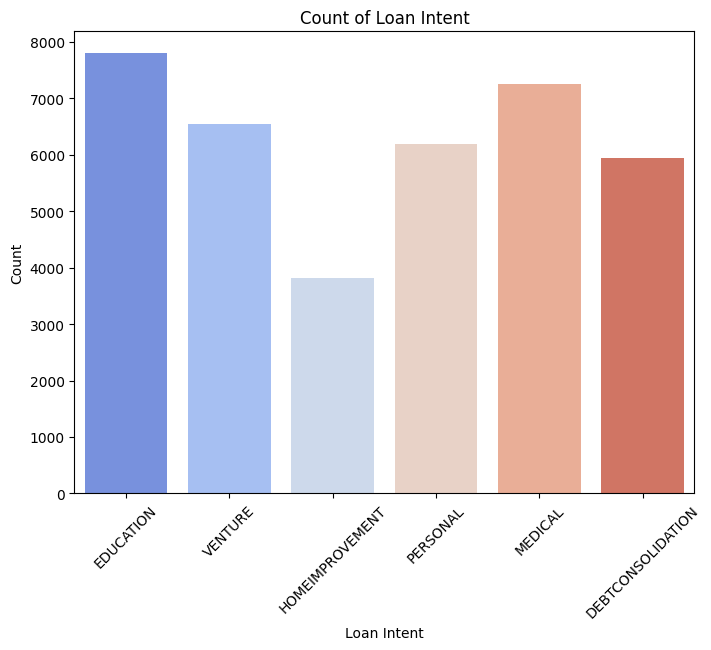

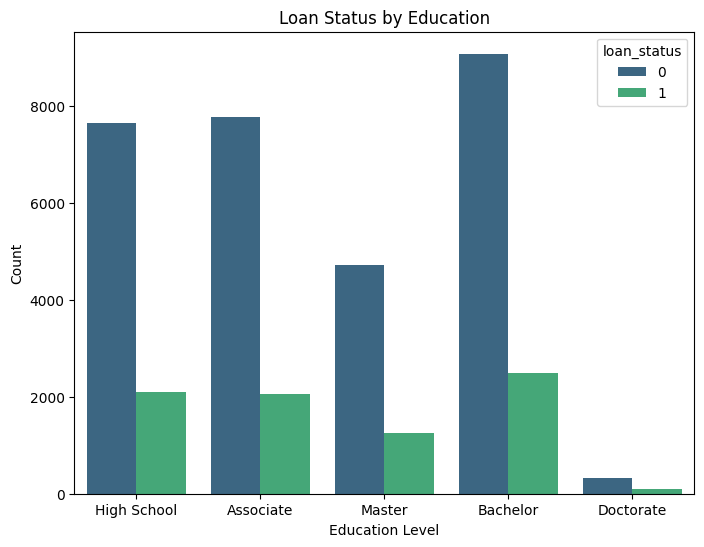

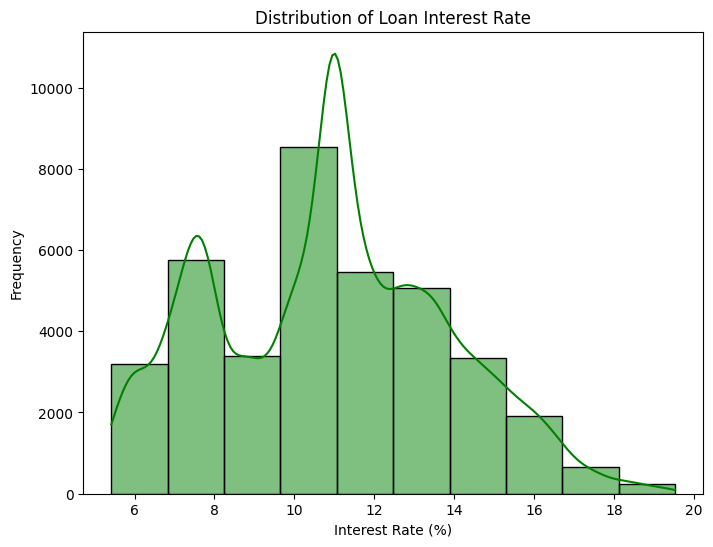

<ipython-input-13-062837a8cba4>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="loan_status", y="credit_score", data=df, palette="pastel")


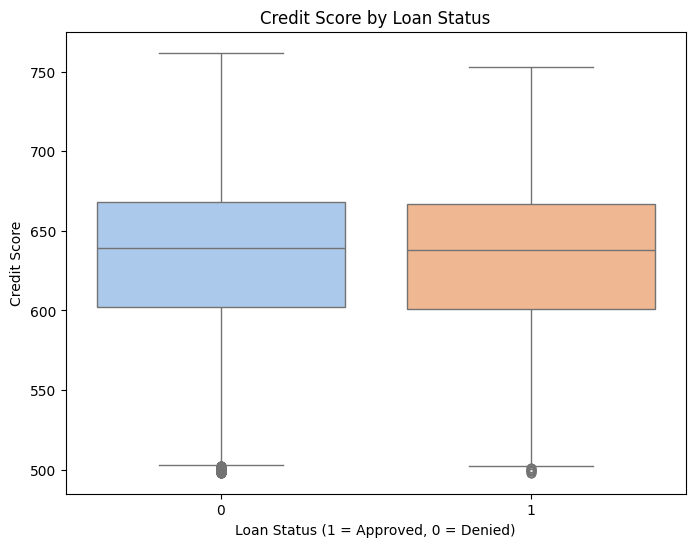

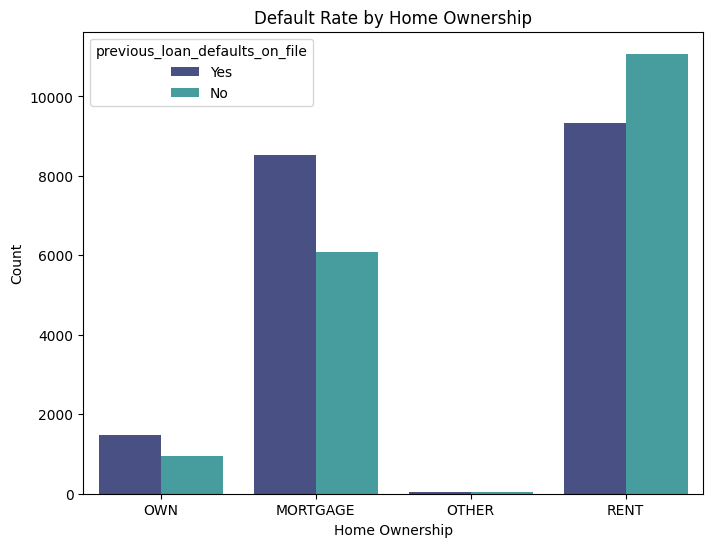

In [13]:
# 1. Distribution of Credit Score
plt.figure(figsize=(8, 6))
sns.histplot(df["credit_score"], kde=True, bins=10, color="blue")
plt.title("Distribution of Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()

# 2. Loan Amount vs. Income
plt.figure(figsize=(8, 6))
sns.scatterplot(x="person_income", y="loan_amnt", hue="loan_status", data=df)
plt.title("Loan Amount vs. Income")
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.show()

# 3. Loan Intent Countplot
plt.figure(figsize=(8, 6))
sns.countplot(x="loan_intent", data=df, palette="coolwarm")
plt.title("Count of Loan Intent")
plt.xlabel("Loan Intent")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 4. Loan Status by Education
plt.figure(figsize=(8, 6))
sns.countplot(x="person_education", hue="loan_status", data=df, palette="viridis")
plt.title("Loan Status by Education")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

# 5. Loan Interest Rate Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["loan_int_rate"], kde=True, bins=10, color="green")
plt.title("Distribution of Loan Interest Rate")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Frequency")
plt.show()

# 6. Credit Score by Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x="loan_status", y="credit_score", data=df, palette="pastel")
plt.title("Credit Score by Loan Status")
plt.xlabel("Loan Status (1 = Approved, 0 = Denied)")
plt.ylabel("Credit Score")
plt.show()

# 7. Default Rate by Home Ownership
plt.figure(figsize=(8, 6))
sns.countplot(x="person_home_ownership", hue="previous_loan_defaults_on_file", data=df, palette="mako")
plt.title("Default Rate by Home Ownership")
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.show()

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE  # For handling class imbalance


In [15]:
# Define categorical columns
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])  # Transform categorical variables into numerical values

print(df.head())  # Check the dataset after encoding


   person_age  person_gender  person_education  person_income  person_emp_exp  \
0        21.0              0                 3        12282.0               0   
1        21.0              0                 3        12951.0               0   
2        21.0              0                 3        12739.0               0   
3        21.0              0                 0        13113.0               0   
4        24.0              0                 4        14283.0               1   

   person_home_ownership  loan_amnt  loan_intent  loan_int_rate  \
0                      2     1000.0            1          11.14   
1                      2     2500.0            5           7.14   
2                      2     1600.0            5          14.74   
3                      2     4500.0            2           8.63   
4                      0     1750.0            1          10.99   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.08                    

In [16]:
from scipy.stats import zscore
# List of numerical columns to apply IQR filtering (EXCLUDE loan_status)
numeric_cols = ["person_income", "loan_amnt", "loan_int_rate", "credit_score"]

# Apply Z-score filtering to numeric features
df_filtered = df[(np.abs(zscore(df[numeric_cols])) < 3).all(axis=1)]

# Check the class distribution
print("After Z-score Outlier Removal:\n", df_filtered["loan_status"].value_counts())


After Z-score Outlier Removal:
 loan_status
0    29517
1     7968
Name: count, dtype: int64


In [17]:
from imblearn.over_sampling import SMOTE

X = df_filtered.drop(columns=["loan_status"])  # Features
y = df_filtered["loan_status"]  # Target variable

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class Distribution After SMOTE:
loan_status
0    29517
1    29517
Name: count, dtype: int64


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)  # Scale features


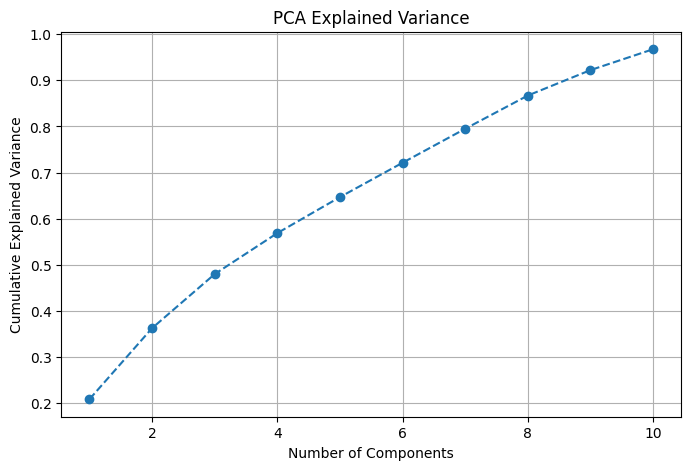

PCA Results:
           PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0     -2.599776 -1.246868 -1.837059 -0.742336 -1.708003  2.189196 -1.426307   
1     -2.602924 -0.096356 -1.338966 -1.990454 -0.554874  0.291946 -2.040331   
2     -2.110501  0.420912 -1.836986  0.021031  1.210460 -0.610510 -1.597083   
3     -2.452442  1.677184 -0.561673 -0.596445 -0.566860 -1.172531 -0.018067   
4     -1.525413 -0.316246 -1.421657  1.037045  1.580300  0.633594 -0.881192   
...         ...       ...       ...       ...       ...       ...       ...   
59029 -1.190894  0.015652 -1.030380  0.240217  0.495814 -0.413239  1.328986   
59030 -0.139330  2.080669 -0.031139 -0.084284  1.916472  0.335619  0.657579   
59031 -0.351539 -1.195355  0.993478  1.079955  1.242054  0.713600  0.881376   
59032  1.701512  0.387775  1.561698  1.128387 -0.500600  0.338469 -1.311516   
59033 -1.012210  1.690684  0.304928  1.072834 -0.295672  0.245890  0.091557   

           PCA8      PCA9     PCA10  


In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Make sure pandas is imported

# Fit PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

# Display PCA results
pca_df = pd.DataFrame(X_pca, columns=[f"PCA{i+1}" for i in range(X_pca.shape[1])])
print("PCA Results:")
print(pca_df)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:", explained_variance_ratio)

# Number of components chosen
print(f"\nNumber of Components Chosen: {pca.n_components_}")


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (47227, 10)
Testing Set Size: (11807, 10)


**Model 1: Logistic Regression**


🔹 Logistic Regression Performance:
Accuracy: 0.8856610485305327
ROC-AUC: 0.8856651938957133
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      5904
           1       0.85      0.93      0.89      5903

    accuracy                           0.89     11807
   macro avg       0.89      0.89      0.89     11807
weighted avg       0.89      0.89      0.89     11807



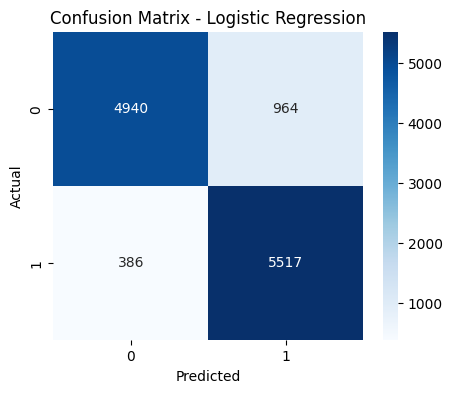

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred_logreg = log_reg.predict(X_test)

# Evaluation Metrics
print("\n🔹 Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


**Model 2: Random Forest Classifier**


🔹 Random Forest Performance:
Accuracy: 0.9120860506479207
ROC-AUC: 0.9120889480430464
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5904
           1       0.89      0.95      0.91      5903

    accuracy                           0.91     11807
   macro avg       0.91      0.91      0.91     11807
weighted avg       0.91      0.91      0.91     11807



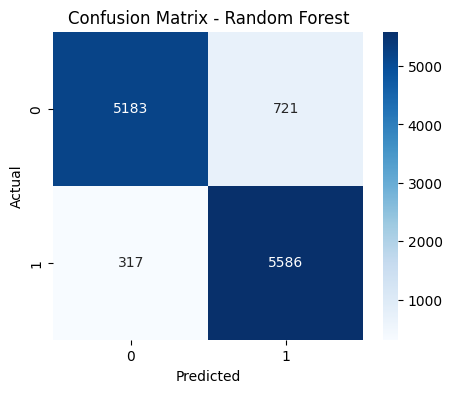

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
print("\n🔹 Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


**Model 3: Support Vector Machine (SVM)**


🔹 SVM Performance:
Accuracy: 0.8998898958245108
ROC-AUC: 0.8998940269450973
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      5904
           1       0.86      0.95      0.90      5903

    accuracy                           0.90     11807
   macro avg       0.90      0.90      0.90     11807
weighted avg       0.90      0.90      0.90     11807



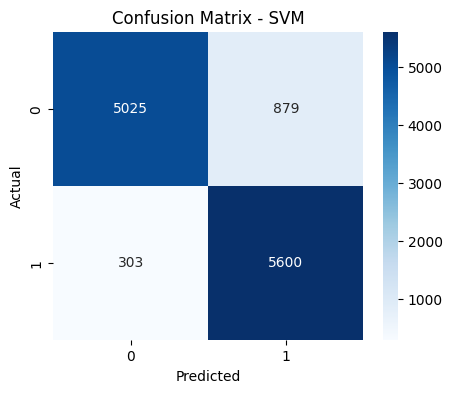

In [23]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation Metrics
print("\n🔹 SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()


**Model 4: XGBoost Classifier**


🔹 XGBoost Performance:
Accuracy: 0.9061573642754298
ROC-AUC: 0.9061598455748237
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      5904
           1       0.88      0.94      0.91      5903

    accuracy                           0.91     11807
   macro avg       0.91      0.91      0.91     11807
weighted avg       0.91      0.91      0.91     11807



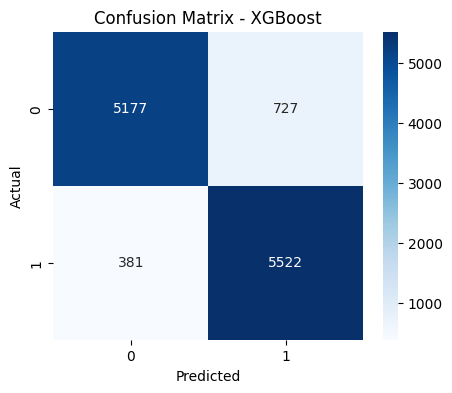

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train XGBoost model
xgb_model = XGBClassifier(eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation Metrics
print("\n🔹 XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 23614, number of negative: 23613
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 47227, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000042
[LightGBM] [Info] Start training from score 0.000042


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



🔹 LightGBM Performance:
Accuracy: 0.9016685017362581
ROC-AUC: 0.9673091790633306
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      5904
           1       0.88      0.93      0.90      5903

    accuracy                           0.90     11807
   macro avg       0.90      0.90      0.90     11807
weighted avg       0.90      0.90      0.90     11807



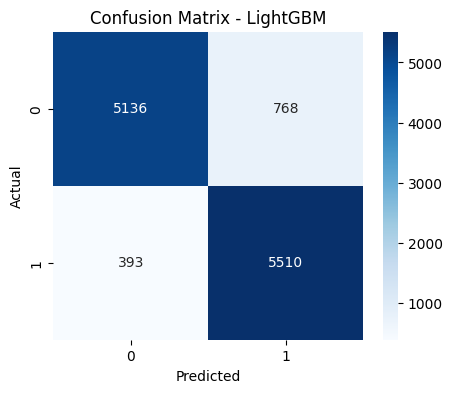

In [25]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the LightGBM model
lgbm_model = LGBMClassifier(random_state=42)

# Train the model
lgbm_model.fit(X_train, y_train)

# Predictions
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluation Metrics
print("\n🔹 LightGBM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_lgbm))
print(classification_report(y_test, y_pred_lgbm))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightGBM")
plt.show()


In [26]:
# Compare models based on ROC-AUC score
model_scores = {
    "Logistic Regression": roc_auc_score(y_test, y_pred_logreg),
    "Random Forest": roc_auc_score(y_test, y_pred_rf),
    "SVM": roc_auc_score(y_test, y_pred_svm),
    "XGBoost": roc_auc_score(y_test, y_pred_xgb)
}

best_model_name = max(model_scores, key=model_scores.get)
print(f"\n🏆 Best Model: {best_model_name} with ROC-AUC Score: {model_scores[best_model_name]}")



🏆 Best Model: Random Forest with ROC-AUC Score: 0.9120889480430464


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


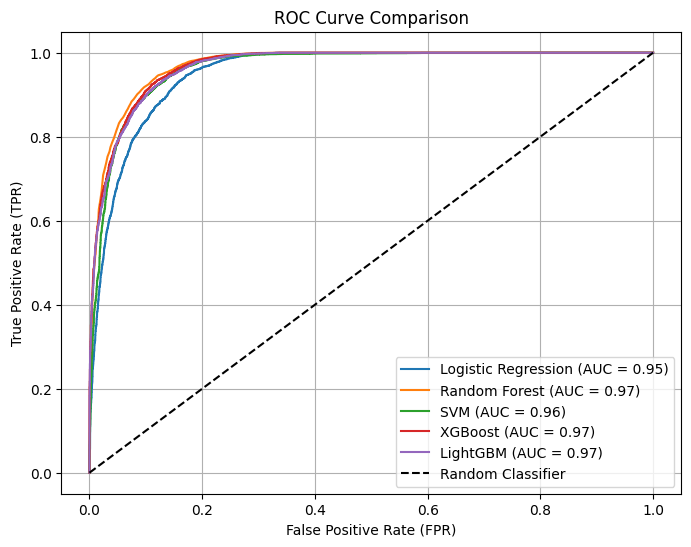

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for each model
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_model,
    "SVM": svm_model,
    "XGBoost": xgb_model,
    "LightGBM": lgbm_model
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]  # Probability estimates
    else:
        y_scores = model.decision_function(X_test)  # SVM case

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()

# Show the plot
plt.show()
